<a href="https://colab.research.google.com/github/tangshuting/daytoy/blob/master/FGSM_VGG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras   # tensorflow模块没有get_default_graph属性 使用tf.keras
from tensorflow.keras import backend, losses
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from keras.utils import np_utils



y_true: 7
y_true: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
iamge: (1, 1, 28, 28)
y_true: (10,)


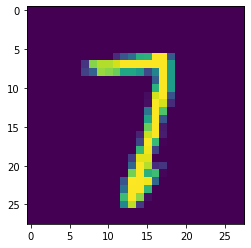

In [0]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
image = test_x[234]
y_true = test_y[234]
print ('y_true:',y_true)
plt.figure()
plt.imshow(image)
# train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
# train_x/= 255

image = image.reshape(1,1,28,28).astype('float32')
# image = image.reshape(-1,224，224,3).astype('float32')
iamge = image/255
y_true = np_utils.to_categorical(y_true, 10)  #one-hot编码
print ('y_true:',y_true)
print ('iamge:',image.shape)
print ('y_true:',y_true.shape)
# print （'iamge:',image.shape）
# print （'y_true:',y_true.shape）

In [0]:
m_model = tf.keras.applications.VGG16(include_top=True,weights='imagenet')
m_model.summary()

In [0]:
def fgsm( m_model, image, y_true, eps=0.1):
    
    m_model = tf.keras.applications.VGG16(include_top=True,weights='imagenet')
   
    #image_pred = m_model.predict_classes(img)
    predict = m_model.predict(image)
    image_pred = np.argmax(predict,axis=1)
    image_pred = np_utils.to_categorical(image_pred, 10)

    loss = losses.categorical_crossentropy(y_true, image_pred)
    gradient = backend.gradients(loss, y_true)   
    gradient = gradient[0]

    adv = image + backend.sign(gradient) * eps  # fgsm算法

    # sess = backend.get_session()   #设置会话
    # adv = sess.run(adv, feed_dict={model.input: image})  # 注意这里传递参数的情况
    adv = np.clip(adv, 0, 1)  
    return adv

In [0]:
def fgsm_attack(image):
    m_model = tf.keras.applications.VGG16(include_top=True,weights='imagenet')
   
    epsilons = [0, 0.01, 0.1, 0.15, 0.2]

    print("开始使用fgsm进行攻击")
    for i, eps in enumerate(epsilons):
        img_attack = fgsm(m_model, image, y_true, eps=eps)
        plt.figure()
        plt.imshow(img_attack)
        #attack =keras.m_model.predict_classes(img_attack)
        attack = m_model.predict(img_attack)
        fgsm_attack = np.argmax(attackt,axis=1)
        Y_adv = np_utils.to_categorical(fgsm_attack, 10)

        # 当识别的结果不等时，表示攻击成功
        #if attack != y_pred:
        if Y_adv != image_pred:
            print('攻击成功，攻击后的结果为：', Y_adv)
fgsm_attack(image)


In [0]:
# if __name__ == "__main__":
#     fgsm_attack(image)

In [0]:
def fgsm( VGG16, image, y_true, eps=0.1):
   with tf.GradientTape() as tape:
    #image_pred = m_model.predict_classes(img)
    predict = VGG16.predict(image)
    image_pred = np.argmax(predict,axis=1)
    image_pred = np_utils.to_categorical(image_pred, 10)
    image_pred_resharp = image_pred.reshape(10,)

    y_true_resharp = y_true.reshape(1,10)
    loss = losses.categorical_crossentropy(y_true_resharp, image_pred)
    
    # gradient = backend.gradients(loss, y_true)   
    # gradient = gradient[0]
    gradient = tape.gradient(loss, y_true_resharp) 
    gradient = gradient[0]
    adv = image + backend.sign(gradient) * eps  # fgsm算法

    sess = backend.get_session()   #设置会话
    adv = sess.run(adv, feed_dict={model.input: image})  # 注意这里传递参数的情况
    adv = np.clip(adv, 0, 1)  
    return adv